In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

%matplotlib inline

In [44]:
df_fire_2022 = pd.read_csv('WFIGS_-_2022_Wildland_Fire_Locations_to_Date.csv', na_values=[''], converters={'FireDiscoveryDateTime': pd.to_datetime})
df_fire_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39530 entries, 0 to 39529
Data columns (total 96 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   X                                39530 non-null  float64            
 1   Y                                39530 non-null  float64            
 2   OBJECTID                         39530 non-null  int64              
 3   ABCDMisc                         2270 non-null   object             
 4   ADSPermissionState               39530 non-null  object             
 5   CalculatedAcres                  549 non-null    float64            
 6   ContainmentDateTime              24273 non-null  object             
 7   ControlDateTime                  20704 non-null  object             
 8   DailyAcres                       30105 non-null  float64            
 9   DiscoveryAcres                   34824 non-null  float64            
 10

/var/folders/xb/3kyhyk0s6zv0y_tv20yntjcr0000gn/T/ipykernel_9929/2350239475.py:1: DtypeWarning: Columns (14,32,61,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fire_2022 = pd.read_csv('WFIGS_-_2022_Wildland_Fire_Locations_to_Date.csv', na_values=[''], converters={'FireDiscoveryDateTime': pd.to_datetime})


In [45]:
CA_fire_2022_df = df_fire_2022[df_fire_2022['POODispatchCenterID'].str.startswith('CA', na=False)]
CA_fire_2022_df.head()

,X,Y,OBJECTID,ABCDMisc,ADSPermissionState,CalculatedAcres,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,...,IsDispatchComplete,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,Source,GlobalID,IsCpxChild,CpxName,CpxID
1,-117.226312,33.942359,236862,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.10,...,0,NaN,NaN,2022/01/01 11:13:42+00,2022/01/01 11:13:42+00,IRWIN,{5E03F67E-7D71-4534-AE65-0507FC23C660},NaN,NaN,NaN
2,-120.634672,35.164286,236877,NaN,DEFAULT,NaN,2022/01/01 16:18:27+00,2022/01/01 18:45:00+00,0.01,0.01,...,0,NaN,NaN,2022/01/01 15:21:58+00,2022/06/24 01:26:38+00,IRWIN,{391610DE-D34B-49A4-A57C-8DAFD6D8BBC7},0.0,NaN,NaN
5,-117.340872,33.690858,236947,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.10,...,0,NaN,NaN,2022/01/01 21:00:26+00,2022/01/01 21:00:26+00,IRWIN,{F3580DF9-15FD-4494-8E78-F11B36AAEAA7},NaN,NaN,NaN
6,-116.932143,34.863903,236958,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.10,...,0,NaN,NaN,2022/01/01 22:44:37+00,2022/01/01 22:44:37+00,IRWIN,{DD881A6C-7D34-4188-BBFE-3C8A3394A472},NaN,NaN,NaN
9,-116.078413,33.569696,236966,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.10,...,0,NaN,NaN,2022/01/02 02:16:24+00,2022/01/02 02:24:59+00,IRWIN,{6A70E1F6-17F7-496B-BFEA-2B980FA4B671},NaN,NaN,NaN


In [47]:
CA_fire_2022_df['POOCounty'].value_counts()

Riverside         3647
Los Angeles       2822
Fresno             630
San Bernardino     427
Merced             387
                  ... 
Douglas              4
Kauai                3
Jackson              2
Honolulu             1
Carson City          1
Name: POOCounty, Length: 66, dtype: int64

In [48]:
df_historical_data = pd.read_csv('WFIGS_-_Wildland_Fire_Locations_Full_History.csv', na_values=[''], converters={'FireDiscoveryDateTime': pd.to_datetime})
df_historical_data.info()

/var/folders/xb/3kyhyk0s6zv0y_tv20yntjcr0000gn/T/ipykernel_9929/1981588489.py:1: DtypeWarning: Columns (13,14,16,32,61,64,68,69,77,78,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df_historical_data = pd.read_csv('WFIGS_-_Wildland_Fire_Locations_Full_History.csv', na_values=[''], converters={'FireDiscoveryDateTime': pd.to_datetime})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246580 entries, 0 to 246579
Data columns (total 96 columns):
 #   Column                           Non-Null Count   Dtype              
---  ------                           --------------   -----              
 0   X                                246580 non-null  float64            
 1   Y                                246580 non-null  float64            
 2   OBJECTID                         246580 non-null  int64              
 3   ABCDMisc                         12940 non-null   object             
 4   ADSPermissionState               246580 non-null  object             
 5   CalculatedAcres                  5349 non-null    float64            
 6   ContainmentDateTime              149988 non-null  object             
 7   ControlDateTime                  135647 non-null  object             
 8   DailyAcres                       171896 non-null  float64            
 9   DiscoveryAcres                   182417 non-null  float64  

In [49]:
CA_his_df = df_historical_data[df_historical_data['POODispatchCenterID'].str.startswith('CA', na=False)]
CA_his_df.head()

,X,Y,OBJECTID,ABCDMisc,ADSPermissionState,CalculatedAcres,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,...,IsDispatchComplete,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,Source,GlobalID,IsCpxChild,CpxName,CpxID
1,-118.180712,33.808985,2,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.1,...,0,NaN,NaN,2020/02/28 20:52:36+00,2020/02/28 20:52:36+00,IRWIN,{0E79B7FD-2882-43CF-8CFA-911BD1C8F77A},NaN,NaN,NaN
3,-117.153901,33.176394,4,NaN,DEFAULT,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,2019/07/01 20:10:12+00,2019/07/01 20:10:12+00,IRWIN,{5DF06F41-9948-49D3-B00A-2D3A1D1049C5},NaN,NaN,NaN
23,-122.901014,41.202338,25,NaN,CERTIFIED,NaN,NaN,NaN,0.1,0.1,...,0,NaN,NaN,2020/08/15 18:51:18+00,2020/09/12 23:15:13+00,IRWIN,{37B20561-7954-48E0-9DD0-24AD4D9F74D6},NaN,NaN,NaN
41,-122.345674,41.716773,46,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.1,...,0,NaN,NaN,2019/09/05 16:39:56+00,2019/09/05 16:50:41+00,IRWIN,{EE7E8F61-9422-487F-9C5D-7BA80A734B30},NaN,NaN,NaN
42,-120.459645,38.079659,47,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.1,...,0,NaN,NaN,2020/05/06 19:10:08+00,2020/05/06 19:11:07+00,IRWIN,{25C24248-54B6-4DF3-8931-BECA45AB9265},NaN,NaN,NaN


In [50]:
CA_his_df['POOCounty'].value_counts()

Los Angeles       14034
Riverside          6937
San Bernardino     1630
Fresno             1511
San Diego          1339
                  ...  
Kauai                 3
Carson City           2
Curry                 1
Klamath               1
Esmeralda             1
Name: POOCounty, Length: 71, dtype: int64

In [51]:
df_fires = pd.concat((CA_his_df, CA_fire_2022_df), axis=0,ignore_index=True)
df_fires['POOCounty'].value_counts()

Los Angeles       16856
Riverside         10584
Fresno             2141
San Bernardino     2057
Shasta             1669
                  ...  
Carson City           3
Maui                  3
Curry                 1
Klamath               1
Esmeralda             1
Name: POOCounty, Length: 71, dtype: int64

In [128]:
df_LA_fires = df_fires[df_fires['POOCounty'] == 'Los Angeles']
df_RS_fires = df_fires[df_fires['POOCounty'] == 'Riverside']
df_RS_fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10584 entries, 5 to 61304
Data columns (total 96 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   X                                10584 non-null  float64            
 1   Y                                10584 non-null  float64            
 2   OBJECTID                         10584 non-null  int64              
 3   ABCDMisc                         29 non-null     object             
 4   ADSPermissionState               10584 non-null  object             
 5   CalculatedAcres                  47 non-null     float64            
 6   ContainmentDateTime              2747 non-null   object             
 7   ControlDateTime                  409 non-null    object             
 8   DailyAcres                       3100 non-null   float64            
 9   DiscoveryAcres                   10437 non-null  float64            
 10

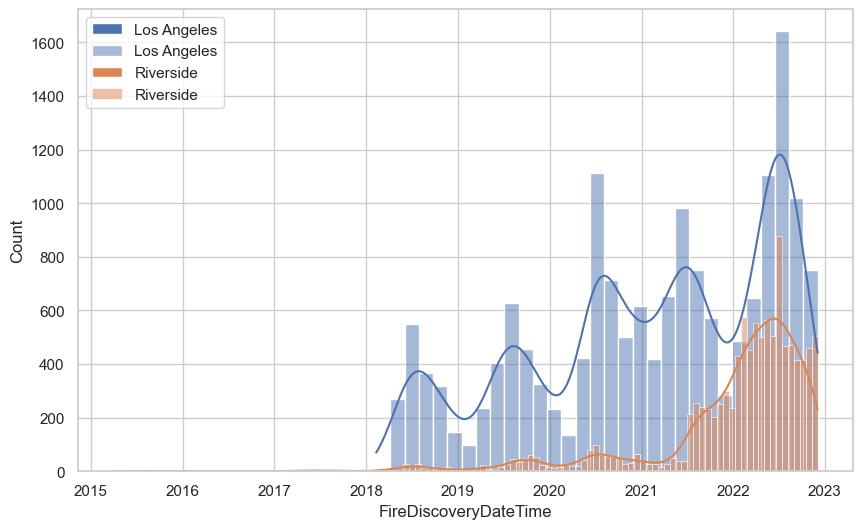

In [72]:
fig = plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.histplot(df_LA_fires["FireDiscoveryDateTime"], label = 'Los Angeles', kde=True)
sns.histplot(df_RS_fires["FireDiscoveryDateTime"], label = 'Riverside', kde=True)
plt.legend() 

<AxesSubplot: xlabel='FireDiscoveryDateTime', ylabel='DiscoveryAcres'>

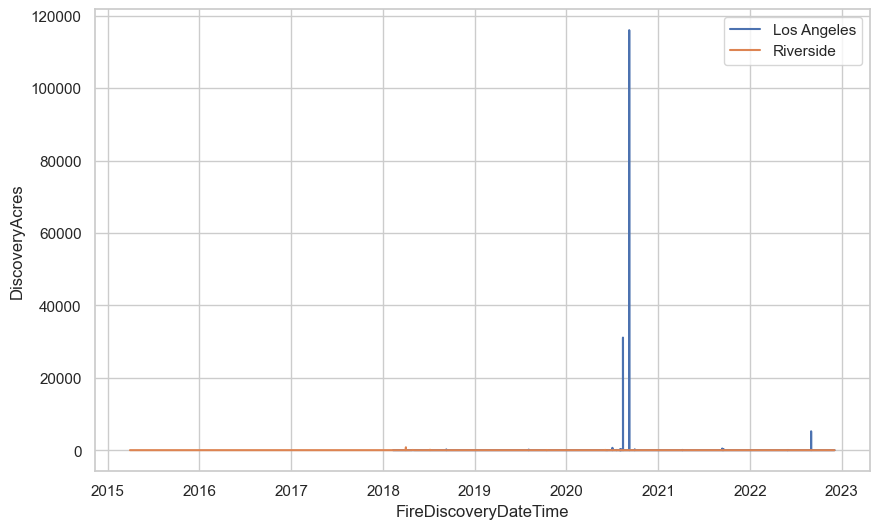

In [74]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(x="FireDiscoveryDateTime", y="DiscoveryAcres", data=df_LA_fires, label = 'Los Angeles')
sns.lineplot(x="FireDiscoveryDateTime", y="DiscoveryAcres", data=df_RS_fires, label = 'Riverside')

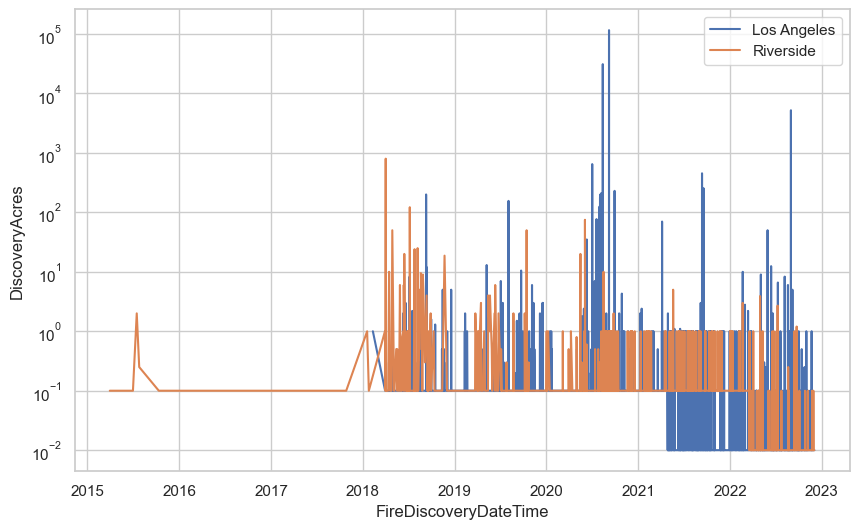

In [75]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="FireDiscoveryDateTime", y="DiscoveryAcres", data=df_LA_fires, label = 'Los Angeles')
h = sns.lineplot(x="FireDiscoveryDateTime", y="DiscoveryAcres", data=df_RS_fires, label = 'Riverside')
g.set_yscale("log")
h.set_yscale("log")

In [88]:
df_LA_fires["DATE"] = pd.to_datetime(df_LA_fires["FireDiscoveryDateTime"]).dt.date
df_LA_fires["DATE"] = pd.to_datetime(df_LA_fires["DATE"])
df_RS_fires["DATE"] = pd.to_datetime(df_RS_fires["FireDiscoveryDateTime"]).dt.date
df_RS_fires["DATE"] = pd.to_datetime(df_RS_fires["DATE"])
df_LA_fires["FireHappened"] = 1
df_RS_fires["FireHappened"] = 1
df_LA_fires = df_LA_fires.filter(["DATE", "DiscoveryAcres", "FireHappened", "POOCounty"])
df_RS_fires = df_RS_fires.filter(["DATE", "DiscoveryAcres", "FireHappened", "POOCounty"])
start_date = '2018-01-01 00:00:00'
df_RS_fires = df_RS_fires[df_RS_fires["DATE"] > start_date]
df_RS_fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10558 entries, 5 to 61304
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            10558 non-null  datetime64[ns]
 1   DiscoveryAcres  10412 non-null  float64       
 2   FireHappened    10558 non-null  int64         
 3   POOCounty       10558 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 412.4+ KB


/var/folders/xb/3kyhyk0s6zv0y_tv20yntjcr0000gn/T/ipykernel_9929/2228501152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LA_fires["DATE"] = pd.to_datetime(df_LA_fires["FireDiscoveryDateTime"]).dt.date
/var/folders/xb/3kyhyk0s6zv0y_tv20yntjcr0000gn/T/ipykernel_9929/2228501152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LA_fires["DATE"] = pd.to_datetime(df_LA_fires["DATE"])
/var/folders/xb/3kyhyk0s6zv0y_tv20yntjcr0000gn/T/ipykernel_9929/2228501152.py:3: SettingWithCopyWarning: 
A value is 

In [89]:
df_RS_fires.head()

,DATE,DiscoveryAcres,FireHappened,POOCounty
5,2020-05-23,0.1,1,Riverside
6,2018-10-09,1.0,1,Riverside
34,2018-08-29,5.0,1,Riverside
46,2021-02-05,0.1,1,Riverside
49,2019-10-11,0.4,1,Riverside


In [90]:
df_LA_fires.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DiscoveryAcres,16672.0,9.718185,931.828009,0.01,0.01,0.1,0.1,115997.0
FireHappened,16856.0,1.000000,0.000000,1.00,1.00,1.0,1.0,1.0


In [91]:
df_RS_fires.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DiscoveryAcres,10412.0,0.193188,8.013235,0.01,0.01,0.01,0.1,800.0
FireHappened,10558.0,1.000000,0.000000,1.00,1.00,1.00,1.0,1.0


In [92]:
df_LA_fires_no_dup = df_LA_fires.drop_duplicates()
df_LA_fires_no_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133 entries, 0 to 47561
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            2133 non-null   datetime64[ns]
 1   DiscoveryAcres  1991 non-null   float64       
 2   FireHappened    2133 non-null   int64         
 3   POOCounty       2133 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 83.3+ KB


In [93]:
df_RS_fires_no_dup = df_RS_fires.drop_duplicates()
df_RS_fires_no_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 5 to 47562
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            1401 non-null   datetime64[ns]
 1   DiscoveryAcres  1285 non-null   float64       
 2   FireHappened    1401 non-null   int64         
 3   POOCounty       1401 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 54.7+ KB


In [102]:
df_LA_weather = pd.read_csv('LA_weather_data.csv', na_values=[''], converters={'DATE': pd.to_datetime})
df_LA_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127328 entries, 0 to 127327
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   STATION  127328 non-null  object        
 1   NAME     127328 non-null  object        
 2   DATE     127328 non-null  datetime64[ns]
 3   AWND     19530 non-null   float64       
 4   DAPR     276 non-null     float64       
 5   MDPR     272 non-null     float64       
 6   PGTM     1294 non-null    float64       
 7   PRCP     89271 non-null   float64       
 8   SNOW     38130 non-null   float64       
 9   SNWD     16901 non-null   float64       
 10  TAVG     41323 non-null   float64       
 11  TMAX     75007 non-null   float64       
 12  TMIN     74897 non-null   float64       
 13  TOBS     17562 non-null   float64       
 14  WDF2     19592 non-null   float64       
 15  WDF5     19152 non-null   float64       
 16  WSF2     19592 non-null   float64       
 17  WSF5     1

In [96]:
df_RS_weather = pd.read_csv('Riverside_weather_data.csv', na_values=[''], converters={'DATE': pd.to_datetime})
df_RS_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81111 entries, 0 to 81110
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  81111 non-null  object        
 1   NAME     81111 non-null  object        
 2   DATE     81111 non-null  datetime64[ns]
 3   AWND     7166 non-null   float64       
 4   DAPR     384 non-null    float64       
 5   MDPR     381 non-null    float64       
 6   PGTM     248 non-null    float64       
 7   PRCP     63606 non-null  float64       
 8   SNOW     36008 non-null  float64       
 9   SNWD     12363 non-null  float64       
 10  TAVG     16114 non-null  float64       
 11  TMAX     40522 non-null  float64       
 12  TMIN     40400 non-null  float64       
 13  TOBS     9616 non-null   float64       
 14  WDF2     7167 non-null   float64       
 15  WDF5     7087 non-null   float64       
 16  WSF2     7168 non-null   float64       
 17  WSF5     7089 non-null   float6

In [103]:
df_LA_weather = df_LA_weather[df_LA_weather["STATION"]== "USW00023187"]
df_LA_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1787 entries, 64813 to 66599
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1787 non-null   object        
 1   NAME     1787 non-null   object        
 2   DATE     1787 non-null   datetime64[ns]
 3   AWND     1715 non-null   float64       
 4   DAPR     0 non-null      float64       
 5   MDPR     0 non-null      float64       
 6   PGTM     330 non-null    float64       
 7   PRCP     1781 non-null   float64       
 8   SNOW     25 non-null     float64       
 9   SNWD     30 non-null     float64       
 10  TAVG     0 non-null      float64       
 11  TMAX     1776 non-null   float64       
 12  TMIN     1776 non-null   float64       
 13  TOBS     0 non-null      float64       
 14  WDF2     1773 non-null   float64       
 15  WDF5     1758 non-null   float64       
 16  WSF2     1773 non-null   float64       
 17  WSF5     1758 non-null   flo

In [97]:
df_RS_weather = df_RS_weather[df_RS_weather["STATION"]== "USW00023158"]
df_RS_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 64402 to 66201
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1800 non-null   object        
 1   NAME     1800 non-null   object        
 2   DATE     1800 non-null   datetime64[ns]
 3   AWND     1791 non-null   float64       
 4   DAPR     0 non-null      float64       
 5   MDPR     0 non-null      float64       
 6   PGTM     41 non-null     float64       
 7   PRCP     1799 non-null   float64       
 8   SNOW     25 non-null     float64       
 9   SNWD     13 non-null     float64       
 10  TAVG     0 non-null      float64       
 11  TMAX     1789 non-null   float64       
 12  TMIN     1790 non-null   float64       
 13  TOBS     0 non-null      float64       
 14  WDF2     1791 non-null   float64       
 15  WDF5     1734 non-null   float64       
 16  WSF2     1791 non-null   float64       
 17  WSF5     1734 non-null   flo

In [104]:
df_LA_weather = df_LA_weather.filter(["DATE", "AWND", "PRCP","SNOW", "TMAX", "TMIN"])
df_LA_weather.head()

,DATE,AWND,PRCP,SNOW,TMAX,TMIN
64813,2018-01-01,11.41,0.0,NaN,66.0,52.0
64814,2018-01-02,18.34,0.0,NaN,65.0,56.0
64815,2018-01-03,14.09,0.0,NaN,61.0,53.0
64816,2018-01-04,11.63,0.0,NaN,67.0,51.0
64817,2018-01-05,8.05,0.0,NaN,65.0,49.0


In [105]:
df_RS_weather = df_RS_weather.filter(["DATE", "AWND", "PRCP","SNOW", "TMAX", "TMIN"])
df_RS_weather.head()

,DATE,AWND,PRCP,SNOW,TMAX,TMIN
64402,2018-01-01,2.91,0.0,NaN,72.0,35.0
64403,2018-01-02,6.71,0.0,NaN,79.0,49.0
64404,2018-01-03,2.68,0.0,NaN,69.0,45.0
64405,2018-01-04,3.58,0.0,NaN,75.0,47.0
64406,2018-01-05,3.58,0.0,NaN,75.0,44.0


In [106]:
df_LA_weather.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AWND,1715.0,13.546426,4.313060,5.59,10.51,12.53,15.66,65.09
PRCP,1781.0,0.032122,0.164896,0.00,0.00,0.00,0.00,2.07
SNOW,25.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
TMAX,1776.0,69.490428,16.560190,30.00,56.00,69.00,84.00,107.00
TMIN,1776.0,51.111486,13.191161,22.00,41.00,50.00,62.00,83.00


In [107]:
df_RS_weather.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AWND,1791.0,8.131736,3.971416,1.79,4.92,7.61,10.51,53.02
PRCP,1799.0,0.007515,0.057921,0.00,0.00,0.00,0.00,0.82
SNOW,25.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
TMAX,1789.0,89.207378,16.659608,48.00,74.00,89.00,105.00,121.00
TMIN,1790.0,61.222905,15.924817,28.00,48.00,60.00,75.00,95.00


<AxesSubplot: xlabel='DATE', ylabel='TMAX'>

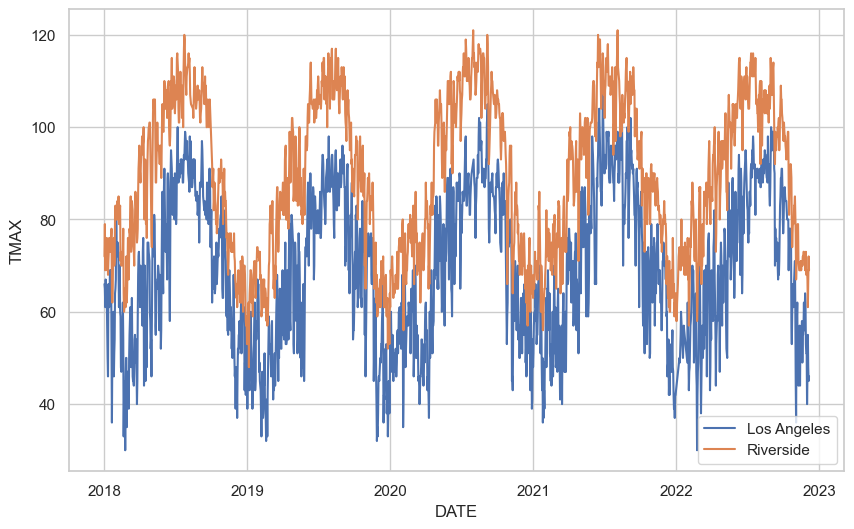

In [109]:
fig = plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.lineplot(data = df_LA_weather, x="DATE", y="TMAX", label = "Los Angeles")
sns.lineplot(data = df_RS_weather, x="DATE", y="TMAX", label = "Riverside")

<AxesSubplot: xlabel='DATE', ylabel='PRCP'>

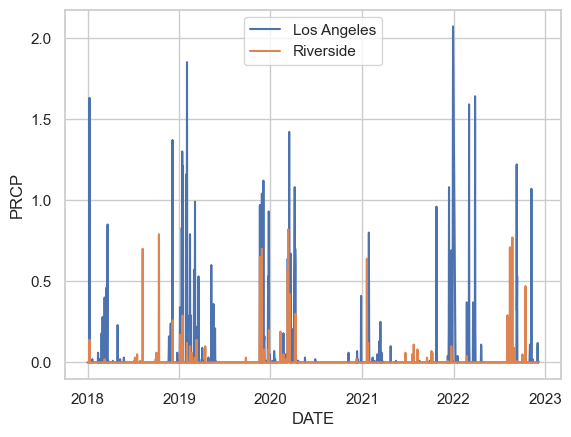

In [110]:
sns.set(style="whitegrid")
sns.lineplot(data = df_LA_weather, x="DATE", y="PRCP", label = "Los Angeles")
sns.lineplot(data = df_RS_weather, x="DATE", y="PRCP", label = "Riverside")

In [112]:
df_LA = pd.merge(df_LA_weather, df_LA_fires_no_dup, how="outer", on="DATE")
df_LA.head(10)

,DATE,AWND,PRCP,SNOW,TMAX,TMIN,DiscoveryAcres,FireHappened,POOCounty
0,2018-01-01,11.41,0.00,NaN,66.0,52.0,NaN,NaN,NaN
1,2018-01-02,18.34,0.00,NaN,65.0,56.0,NaN,NaN,NaN
2,2018-01-03,14.09,0.00,NaN,61.0,53.0,NaN,NaN,NaN
3,2018-01-04,11.63,0.00,NaN,67.0,51.0,NaN,NaN,NaN
4,2018-01-05,8.05,0.00,NaN,65.0,49.0,NaN,NaN,NaN
5,2018-01-06,12.08,0.00,NaN,64.0,50.0,NaN,NaN,NaN
6,2018-01-07,12.08,0.00,NaN,62.0,48.0,NaN,NaN,NaN
7,2018-01-08,11.86,1.20,NaN,56.0,46.0,NaN,NaN,NaN
8,2018-01-09,18.34,1.63,NaN,50.0,40.0,NaN,NaN,NaN
9,2018-01-10,14.54,0.22,NaN,46.0,42.0,NaN,NaN,NaN


In [113]:
df_RS = pd.merge(df_RS_weather, df_RS_fires_no_dup, how="outer", on="DATE")
df_RS.head(10)

,DATE,AWND,PRCP,SNOW,TMAX,TMIN,DiscoveryAcres,FireHappened,POOCounty
0,2018-01-01,2.91,0.00,NaN,72.0,35.0,NaN,NaN,NaN
1,2018-01-02,6.71,0.00,NaN,79.0,49.0,NaN,NaN,NaN
2,2018-01-03,2.68,0.00,NaN,69.0,45.0,NaN,NaN,NaN
3,2018-01-04,3.58,0.00,NaN,75.0,47.0,NaN,NaN,NaN
4,2018-01-05,3.58,0.00,NaN,75.0,44.0,NaN,NaN,NaN
5,2018-01-06,3.58,0.00,NaN,74.0,49.0,NaN,NaN,NaN
6,2018-01-07,5.59,0.00,NaN,76.0,56.0,NaN,NaN,NaN
7,2018-01-08,2.24,0.00,NaN,69.0,56.0,NaN,NaN,NaN
8,2018-01-09,8.05,0.14,NaN,73.0,51.0,NaN,NaN,NaN
9,2018-01-10,3.58,0.00,NaN,68.0,44.0,NaN,NaN,NaN


In [114]:
df_LA = df_LA.fillna(0)
df_LA.head()

,DATE,AWND,PRCP,SNOW,TMAX,TMIN,DiscoveryAcres,FireHappened,POOCounty
0,2018-01-01,11.41,0.0,0.0,66.0,52.0,0.0,0.0,0
1,2018-01-02,18.34,0.0,0.0,65.0,56.0,0.0,0.0,0
2,2018-01-03,14.09,0.0,0.0,61.0,53.0,0.0,0.0,0
3,2018-01-04,11.63,0.0,0.0,67.0,51.0,0.0,0.0,0
4,2018-01-05,8.05,0.0,0.0,65.0,49.0,0.0,0.0,0


In [115]:
df_RS = df_RS.fillna(0)
df_RS.head()

,DATE,AWND,PRCP,SNOW,TMAX,TMIN,DiscoveryAcres,FireHappened,POOCounty
0,2018-01-01,2.91,0.0,0.0,72.0,35.0,0.0,0.0,0
1,2018-01-02,6.71,0.0,0.0,79.0,49.0,0.0,0.0,0
2,2018-01-03,2.68,0.0,0.0,69.0,45.0,0.0,0.0,0
3,2018-01-04,3.58,0.0,0.0,75.0,47.0,0.0,0.0,0
4,2018-01-05,3.58,0.0,0.0,75.0,44.0,0.0,0.0,0


In [116]:
df_RS.SNOW.unique()

array([0.])

In [118]:
# All zero in SNOW, we can delete this column
df_LA = df_LA.filter(["AWND","PRCP","TMAX","TMIN","DiscoveryAcres","FireHappened"])
df_RS = df_RS.filter(["AWND","PRCP","TMAX","TMIN","DiscoveryAcres","FireHappened"])
df_all = pd.concat([df_RS,df_LA], ignore_index=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4295 entries, 0 to 4294
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AWND            4295 non-null   float64
 1   PRCP            4295 non-null   float64
 2   TMAX            4295 non-null   float64
 3   TMIN            4295 non-null   float64
 4   DiscoveryAcres  4295 non-null   float64
 5   FireHappened    4295 non-null   float64
dtypes: float64(6)
memory usage: 201.5 KB


<AxesSubplot: >

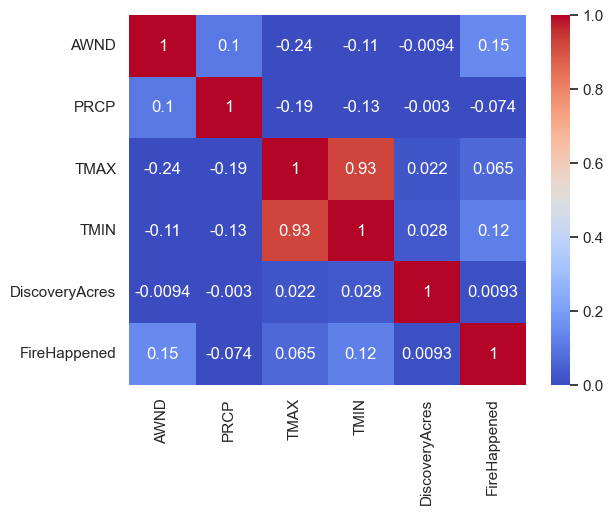

In [119]:
sns.heatmap(df_all.corr(), cmap= "coolwarm", annot= True, vmin=0, vmax=1)

In [120]:
print((df_all["FireHappened"] == 1).sum())
print((df_all["FireHappened"] == 0).sum())

3534
761


In [121]:
fire_X = df_all.filter(["AWND","PRCP","TMAX","TMIN"])
fire_Y = df_all["FireHappened"]
X_train, X_test, y_train, y_test = train_test_split(fire_X, fire_Y, test_size=0.3)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.821567106283941


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


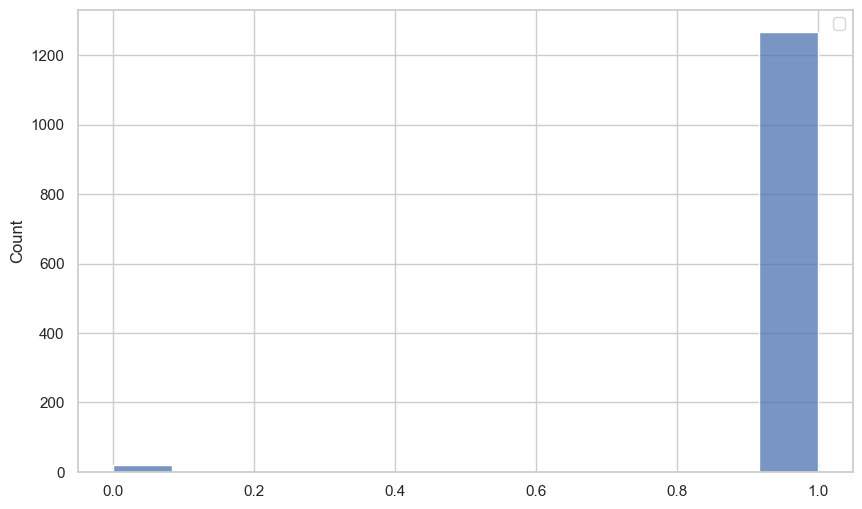

In [122]:
fig = plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.histplot(y_pred)
plt.legend() 

In [126]:
fire_X = df_all.filter(["AWND","PRCP","TMAX","TMIN"])
fire_Y = df_all["FireHappened"]
X_train, X_test, y_train, y_test = train_test_split(fire_X, fire_Y, test_size=0.2)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8183934807916181


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


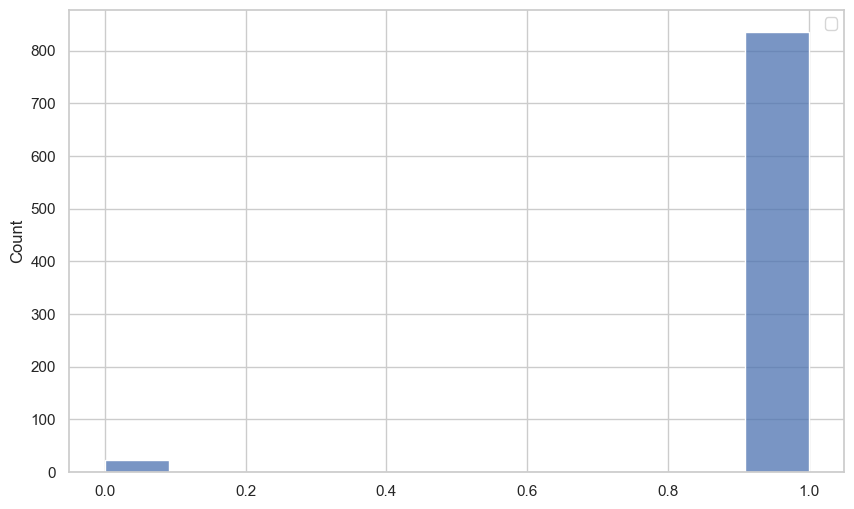

In [127]:
fig = plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.histplot(y_pred)
plt.legend() 

In [133]:
fire_X = df_all.filter(["AWND","PRCP","TMAX","TMIN"])
fire_Y = df_all["FireHappened"]
X_train, X_test, y_train, y_test = train_test_split(fire_X, fire_Y, test_size=0.3)
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

Text(0.5, 427.9555555555555, 'Predicted label')

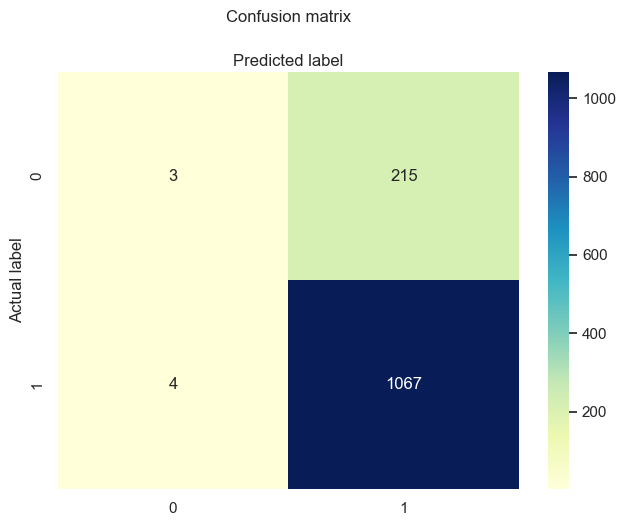

In [139]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label')

In [141]:
target_names = ['No Wild Fire', 'Wild Fire']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

No Wild Fire       0.43      0.01      0.03       218
   Wild Fire       0.83      1.00      0.91      1071

    accuracy                           0.83      1289
   macro avg       0.63      0.51      0.47      1289
weighted avg       0.76      0.83      0.76      1289

